# Zadanie 1.

## Generator ACORN (Additive Congruential Random Number)

Generator ACORN k-tego rzędu oparty jest na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne

$$
X_n^0 = X_{n-1}^0, \quad n \geq 1
$$

$$
X_n^m = (X_{n-1}^{m} + X_n^{m-1}) \mod M, \quad m = 1, \ldots, k, \quad n \geq 1
$$

$$
Y_n^k = \frac{X_n^k}{M}, \quad n \geq 1.
$$

Jeśli ziarno (pierwszy element wektora o elementach $X_0^m \in \{0, \ldots, M \}$, czyli $X_0^0 \in \{1, \ldots, M - 1\}$, jest względnie pierwsze z $M$ oraz $M$ jest dostatecznie dużą liczbą naturalną, to generator posiada pożądane cechy a ciąg $Y_n^k$ dla $n \geq 1$ przypomina ciąg IID zmiennych losowych z rozkładu jednostajnego $U(0,1)$. Zaimplementuj generator jako funkcję ACORN(N, k, M, Lag)zwracającą $N$ liczb pseudolosowych $Y_n^k$ dla $n = 1, \ldots, N$, korzystając z algorytmu $k$-tego rzędu, przy pominięciu pierwszych Lag wyrazów. Przykładowymi parametrami mogą być $M = 2^{89} - 1$ (liczba pierwsza Mersenne'a), $k = 9$, $X_0^m = 0$ dla $m \neq 0$ (mogą być dowolne), Lag = 10^3 (czy to na pewno OK?). Sprawdź poprawność wyniku robiąc wykresy ciągu $Y_n^k$, funkcji $Y_n^k \mapsto Y_{n-1}^k$ oraz histogramy. Porównaj wydajność z wbudowanym generatorem numpy.


## Implementacja algorytmu

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import typing
from numpy.typing import NDArray

In [5]:
def ACORN(
        N: int,
        k: int,
        M: int,
        Lag: int
        ) -> NDArray:
    '''
        Generator zmiennych losowych z rozkładu jednostajnego.

        Parametry:
        N: liczba generowanych zmiennych
        k: rząd algorytmu
        M: dzielnik
        Lag: opóźnienie w działaniu algorytmu (pominięcie Lag pierwszych wyrazów)

        Zaleca się użycie: k>10, M=2**60 lub M=2^120.

        Zwraca:
        Wektor zmiennych losowych.

        Wiecęj informacji: https://acorn.wikramaratna.org/concept.html
        '''
    X0 = np.zeros(k+1)
    X0[0] = 487
    Y = np.zeros(N) 
    X = np.zeros((k+1,Lag+N+1)) 
    X[:,0] = X0

    for n in range(1,Lag+N+1):
        X[0][n] = X0[0]
    
    for m in range(1,k+1):
        for n in range(1,Lag+N+1):
            X[m][n] = (X[m-1][n] + X[m][n-1]) % M
    
    Y = X[k][Lag:]/M

    return Y

## Sprawdzenie poprawności działania

### Scatter plot

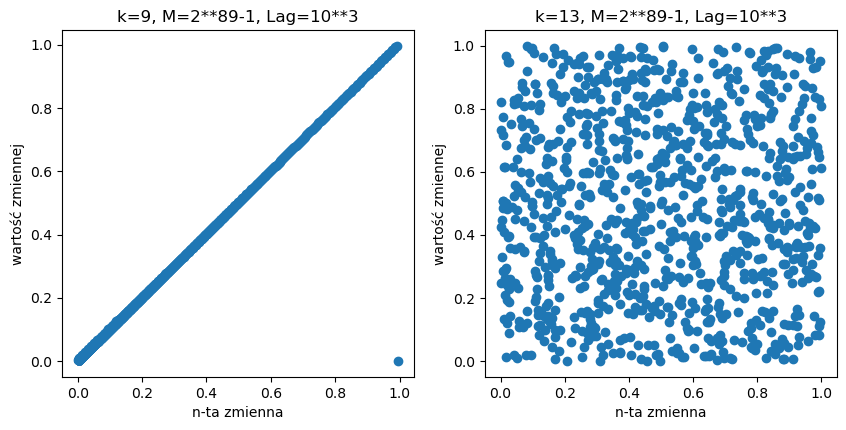

In [35]:
vals1 = ACORN(1000,9,2**89-1,10**3)
vals2 = ACORN(1000,13,2**89-1,10**3)
fig, ax = plt.subplots(1,2, figsize=(10,4.5))
ax[0].scatter(vals1[:1000], vals1[1:])
ax[1].scatter(vals2[:1000], vals2[1:])
ax[0].set_xlabel('n-ta zmienna')
ax[0].set_ylabel('wartość zmiennej')
ax[1].set_xlabel('n-ta zmienna')
ax[1].set_ylabel('wartość zmiennej')
ax[0].set_title('k=9, M=2**89-1, Lag=10**3')
ax[1].set_title('k=13, M=2**89-1, Lag=10**3')
plt.show()

### Histogram

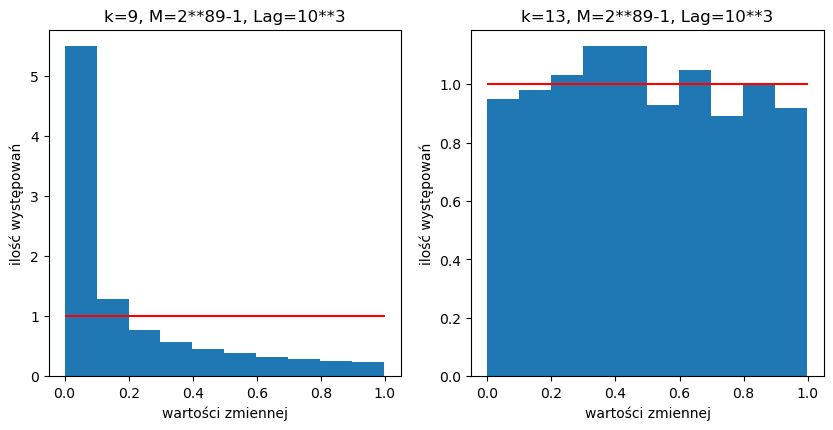

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,4.5))
ax[0].hist(vals1, bins=10, density=True)
ax[1].hist(vals2, bins=10, density=True)
ax[0].hlines(1, xmin=0, xmax=1, color='red')
ax[1].hlines(1, xmin=0, xmax=1, color='red')
ax[0].set_xlabel('wartości zmiennej')
ax[0].set_ylabel('ilość występowań')
ax[1].set_xlabel('wartości zmiennej')
ax[1].set_ylabel('ilość występowań')
ax[0].set_title('k=9, M=2**89-1, Lag=10**3')
ax[1].set_title('k=13, M=2**89-1, Lag=10**3')
plt.show()

## Porównanie z biblioteką numpy

100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


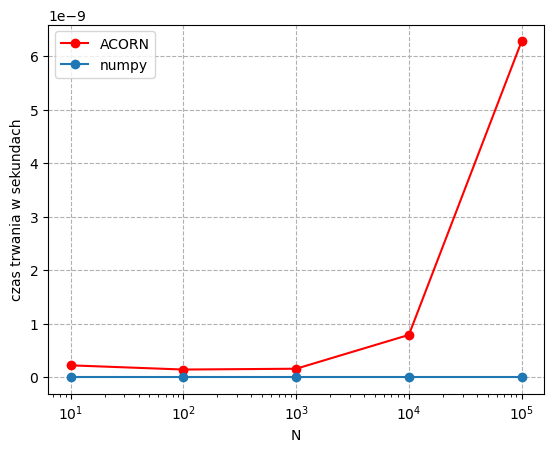

In [52]:
Ns = [10, 100, 1000, 10000, 100000]

times_acorn = []
times_numpy = []

for n in tqdm(Ns):

    s = time.time()
    ACORN(n,13,2**89-1,10**3)
    f = time.time()
    times_acorn.append((f-s)*10**(-9))

    s = time.time()
    np.random.uniform(size=n)
    f = time.time()
    times_numpy.append((f-s)*10**(-9))

plt.plot(Ns, times_acorn, label='ACORN', color='red', marker='o')
plt.plot(Ns, times_numpy, label='numpy', marker='o')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('czas trwania w sekundach')
plt.grid(linestyle='--')
plt.legend()
plt.show()
